# Energy System Model

Load python libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
%matplotlib inline

Load 3YP specific libraries

In [14]:
os.chdir("/Users/scotwheeler/Documents/repos/leo_3yp_2020/")  # set working directory to main folder, one folder above where this notebook is stored


# import modules from OxEMF package
from OxEMF import Assets as AS
from OxEMF import EnergySystem as ES      
import OxEMF.Market as MK

os.chdir("OxEMF/")

Set parameters common to energy system

In [15]:
dt = 30/60 #1 minute time intervals
T = int((24*365)/dt) #Number of intervals

Setup the assets

In [16]:
dispatchable = []
non_dispatchable = []
all_assets = []

#PV source
pv_capacity = 4 # kW
pv_site1 = AS.pvAsset(pv_capacity)
non_dispatchable.append(pv_site1)

#Load
nHouses = 1
load_site1 = AS.loadAsset(nHouses)
non_dispatchable.append(load_site1)

#Battery
battery_capacity = 2.5 # kWh
battery_power = 1 # kW
battery_site1 = AS.IdealBatteryAsset(battery_capacity, battery_power, dt, T)
dispatchable.append(battery_site1)

Setup and run energy system

In [17]:
# setup
energy_system = ES.EnergySystem(non_dispatchable, dispatchable, dt, T)
# run
net_load = energy_system.basic_energy_balance()

Setup and run the market

In [18]:
# setup
market1 = MK.marketObject(energy_system, datetime.datetime(2017,1,1), datetime.datetime(2017,12,31,23,59,59), export_FiT=4.2)
# run
opCost = market1.getGridCost().sum()

Display outputs

Operating cost: £ 164.575


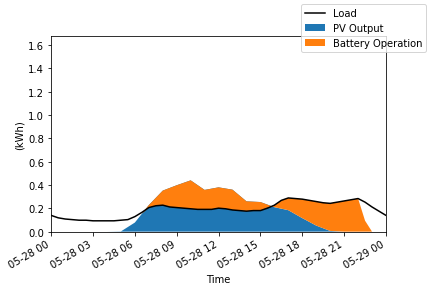

In [19]:
print('Operating cost: £ %3.3f'%(opCost/100))

date_index = pd.date_range(start=datetime.datetime(2017,1,1), end=datetime.datetime(2017,12,31,23,59,59), freq='0.5H')
labels = ['PV Output', 'Battery Operation']
fig, ax = plt.subplots()
p1 = ax.stackplot(date_index, pv_site1.output.T, battery_site1.output.T, labels=labels)
p2 = ax.plot(date_index, load_site1.output, '-k', label='Load')
fig.autofmt_xdate()
plt.ylabel('(kWh)', color='k')
plt.xlabel('Time', color='k')
plt.xlim((datetime.datetime(2017,5,28), datetime.datetime(2017,5,29)))
fig.legend()
plt.show()